In [5]:
#read cnt.csv file and write the minmum value of col6-single file
#save the data into min_value.txt
import pandas as pd
import os

# 设定数据路径和文件路径
data_path = r"D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001"
file_path = os.path.join(data_path, 'cnt.csv')

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 提取第六列
col_6 = df.iloc[:, 5]

# 找到最小值
min_value_col6 = col_6.min()

# 找到最小值的索引
min_index = col_6.idxmin()
# 获取对应第一列的值
corresponding_value = df.iloc[min_index, 0]

# 打印最小值和对应值
print("min_value= ", min_value_col6)
print("cnt_frcture point= ", corresponding_value)

# 保存路径
save_path = os.path.join(data_path, "min_value.txt")
# 保存对应第一列的值到文件
with open(save_path, 'w') as f:
    f.write(f"min_value={min_value_col6}\n")
    f.write(f"cnt_frcture point={corresponding_value}")

print("Value saved to: ", save_path)

min_value=  0
cnt_frcture point=  5
Value saved to:  D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\min_value.txt


In [2]:
#Turn the C60 density x coordinates into relative coordinates
#Save the modified data in c60_modify.csv
#c60.csv-c60_modify.csv
import pandas as pd
import os

# 定义文件路径
csv_file_path = r"D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\c60.csv"
min_value_file_path = r"D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\min_value.txt"

# 读取min_value.txt文件
try:
    with open(min_value_file_path, 'r') as file:
        lines = file.readlines()
        if len(lines) < 2:
            print("min_value.txt文件没有第二行。")
            exit()
        # 获取第二行的值并转换为浮点数
        min_value = float(lines[1].split("=")[-1].strip())
except Exception as e:
    print(f"读取min_value.txt时出错: {e}")
    exit()

# 读取c60.csv文件
try:
    df_c60 = pd.read_csv(csv_file_path)
except Exception as e:
    print(f"读取c60.csv时出错: {e}")
    exit()

# 检查第一列是否存在
if df_c60.shape[1] < 1:
    print("c60.csv文件中没有数据。")
    exit()
print("original_col1\n",df_c60.iloc[:, 0])
# 对第一列进行减法操作
df_c60.iloc[:, 0] = df_c60.iloc[:, 0] - min_value
print("df_c60.iloc1\n",df_c60.iloc[:, 0])
# 保存结果到新的CSV文件（或覆盖原文件）
output_file_path = r"D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\c60_modified1.csv"
try:
    df_c60.to_csv(output_file_path, index=False)
    print(f"修改后的数据已保存到 {output_file_path}")
except Exception as e:
    print(f"保存文件时出错: {e}")

original_col1
 0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Unnamed: 0, dtype: int64
df_c60.iloc1
 0   -4.0
1   -3.0
2   -2.0
3   -1.0
4    0.0
5    1.0
6    2.0
7    3.0
8    4.0
9    5.0
Name: Unnamed: 0, dtype: float64
修改后的数据已保存到 D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\c60_modified1.csv


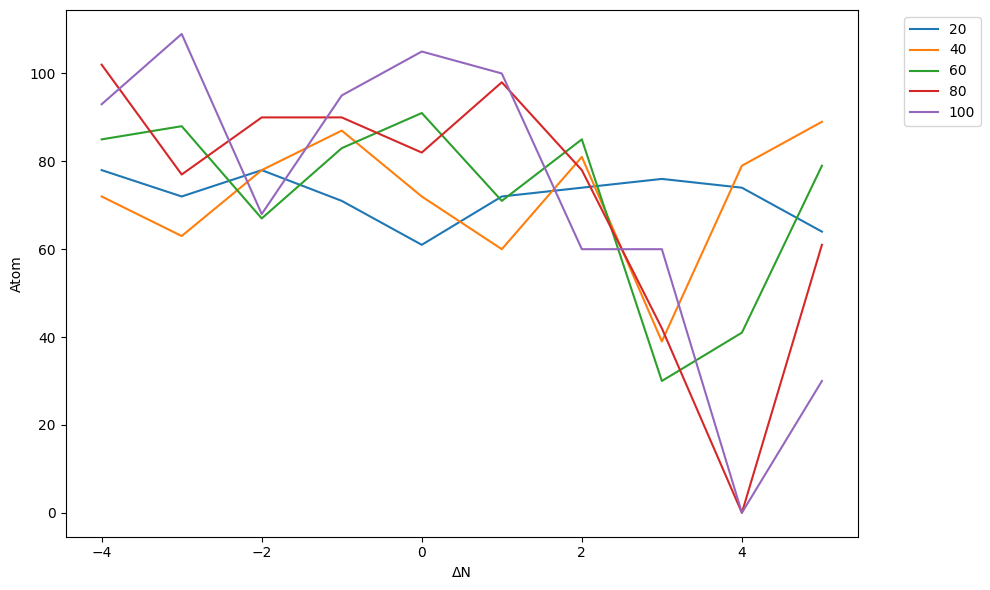

In [6]:
#C60 density diagram under the relative position of drawing
import pandas as pd
import matplotlib.pyplot as plt
import os

# 定义文件路径
modified_csv_file_path = r"D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\c60_modified.csv"

# 检查文件是否存在
if not os.path.exists(modified_csv_file_path):
    print(f"文件 {modified_csv_file_path} 不存在。")
    exit()

# 读取修改后的CSV文件
try:
    df_modified = pd.read_csv(modified_csv_file_path)
except Exception as e:
    print(f"读取修改后的CSV文件时出错: {e}")
    exit()

# 检查数据是否合法
if df_modified.shape[1] < 2:
    print("c60_modified.csv文件中没有足够的数据。")
    exit()

# 提取横坐标（第一列）
x_data = df_modified.iloc[:, 0]

# 设置图形
plt.figure(figsize=(10, 6))

# 遍历其他列，绘制每一列数据
for i in range(1, df_modified.shape[1]):
    y_data = df_modified.iloc[:, i]
    label = f"{20 * i}"  # 生成标签
    
    plt.plot(x_data, y_data, label=label)  # 绘图

# 添加图例
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加标题和轴标签
# plt.title('Data from c60_modified.csv')
plt.xlabel('ΔN')
plt.ylabel('Atom')

# 显示网格
# plt.grid()

# 显示图形
plt.tight_layout()
plt.show()

In [7]:
#The file in multiple sub -directory in the processing directory and gets min_value.txt
import pandas as pd
import os

# 设定数据路径
base_data_path = r"D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std"

# 遍历指定路径下的所有子目录
for root, dirs, files in os.walk(base_data_path):
    if 'cnt.csv' in files:
        file_path = os.path.join(root, 'cnt.csv')
        
        # 读取 CSV 文件
        df = pd.read_csv(file_path)
        
        # 提取第六列
        col_6 = df.iloc[:, 5]
        
        # 找到最小值
        min_value_col6 = col_6.min()
        
        # 找到最小值的索引
        min_index = col_6.idxmin()
        # 获取对应第一列的值
        corresponding_value = df.iloc[min_index, 0]
        
        # 打印最小值和对应值
        print(f"Processing file: {file_path}")
        print("min_value= ", min_value_col6)
        print("cnt_frcture point= ", corresponding_value)
        
        # 保存路径（在当前子目录下创建或覆盖 min_value.txt）
        save_path = os.path.join(root, "min_value.txt")
        # 保存对应第一列的值到文件
        with open(save_path, 'w') as f:
            f.write(f"min_value= {min_value_col6}")
            f.write(f"cnt_frcture point= {corresponding_value}")
        
        print("Value saved to: ", save_path)

Processing file: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\cnt.csv
min_value=  0
cnt_frcture point=  5
Value saved to:  D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\min_value.txt
Processing file: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\002\cnt.csv
min_value=  0
cnt_frcture point=  3
Value saved to:  D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\002\min_value.txt
Processing file: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\003\cnt.csv
min_value=  14
cnt_frcture point=  10
Value saved to:  D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\003\min_value.txt
Processing file: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\004\cnt.csv
min_value=  0
cnt_frcture point=  8
Value saved to:  D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\004\min_value.txt
Processing file: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\005\cnt.csv
min_value=  2
cnt_frcture point=  3
Value saved to:  D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\005\min_value.txt


In [8]:
#Cap the C60 density X coordinates in the sub -directory in the directory into relative coordinates
#Save the modified file c60_modify.csv to their respective directory
#c60.csv-c60_modify.csv
import pandas as pd
import os

# 定义主目录
main_directory = r"D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std"

# 遍历主目录下的所有子目录
for root, dirs, files in os.walk(main_directory):
    # 读取min_value.txt文件
    for curDir in dirs:
        min_value_file_path = os.path.join(root, curDir, "min_value.txt")
        csv_file_path = os.path.join(root, curDir, "c60.csv")
        print("min_value_file_path:", min_value_file_path)
        print("csv_file_path:", csv_file_path)
        try:
            with open(min_value_file_path, 'r') as file:
                lines = file.readlines()
                if len(lines) < 2:
                    print(f"{min_value_file_path} 文件没有第二行。")
                    continue  # 使用continue来继续下一个子目录
                # 获取第二行的值并转换为浮点数
                min_value = float((lines[1].split("="))[-1].strip())
        except Exception as e:
            print(f"读取 {min_value_file_path} 时出错: {e}")
            continue

        # 读取c60.csv文件
        try:
            df_c60 = pd.read_csv(csv_file_path)
        except Exception as e:
            print(f"读取 {csv_file_path} 时出错: {e}")
            continue

        # 检查第一列是否存在
        if df_c60.shape[1] < 1:
            print(f"{csv_file_path} 文件中没有数据。")
            continue
        print("original_col1\n", df_c60.iloc[:, 0])
        
        # 对第一列进行减法操作
        df_c60.iloc[:, 0] = df_c60.iloc[:, 0] - min_value
        print("df_c60.iloc1\n", df_c60.iloc[:, 0])
        
        # 保存结果到新的CSV文件（或覆盖原文件）
        output_file_path = os.path.join(root, curDir, "c60_modified.csv")  # 修正拼写错误
        try:
            df_c60.to_csv(output_file_path, index=False)
            print(f"修改后的数据已保存到 {output_file_path}")
        except Exception as e:
            print(f"保存文件时出错: {e}")

min_value_file_path: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\min_value.txt
csv_file_path: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\c60.csv
D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\min_value.txt 文件没有第二行。
min_value_file_path: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\002\min_value.txt
csv_file_path: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\002\c60.csv
D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\002\min_value.txt 文件没有第二行。
min_value_file_path: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\003\min_value.txt
csv_file_path: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\003\c60.csv
D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\003\min_value.txt 文件没有第二行。
min_value_file_path: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\004\min_value.txt
csv_file_path: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\004\c60.csv
D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\004\min_value.txt 文件没有第二行。
min_value_file_path: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\005\min_value.txt
csv_file_path: D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\005\c60.csv
D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\005\min_value.txt 文件没有第二行。


D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001\001_c60_plot.png


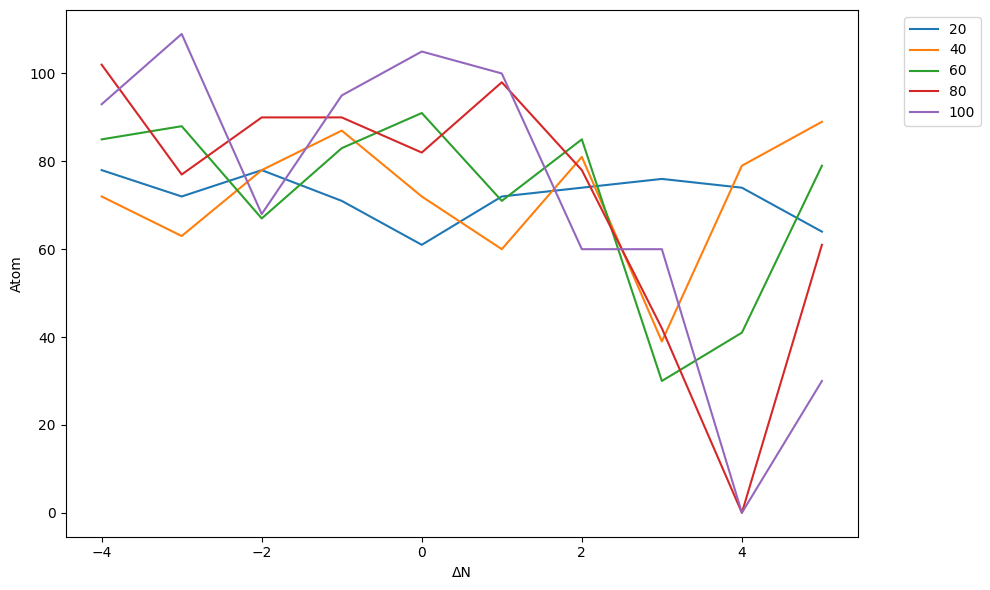

D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\002\002_c60_plot.png


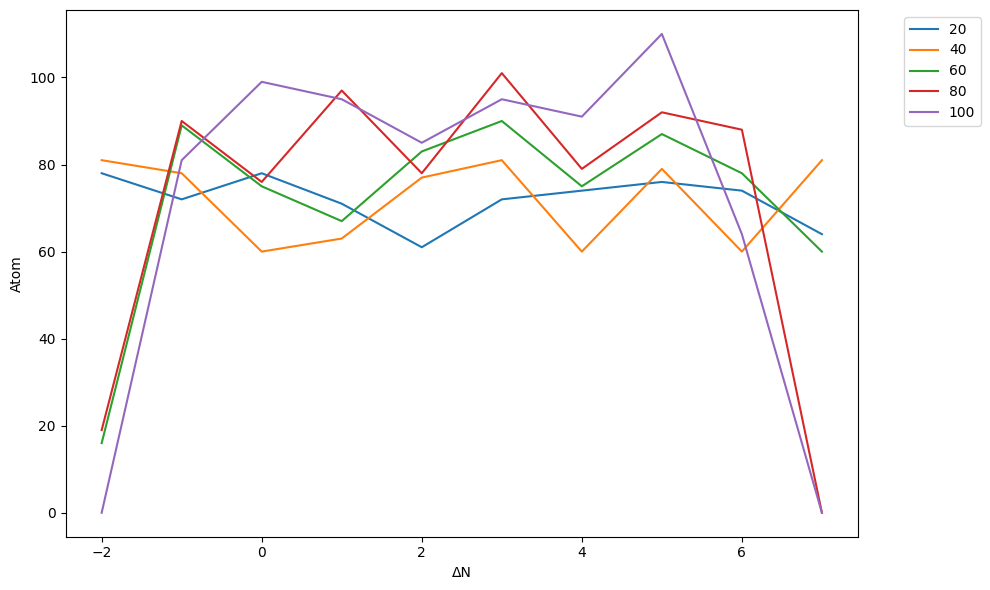

D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\003\003_c60_plot.png


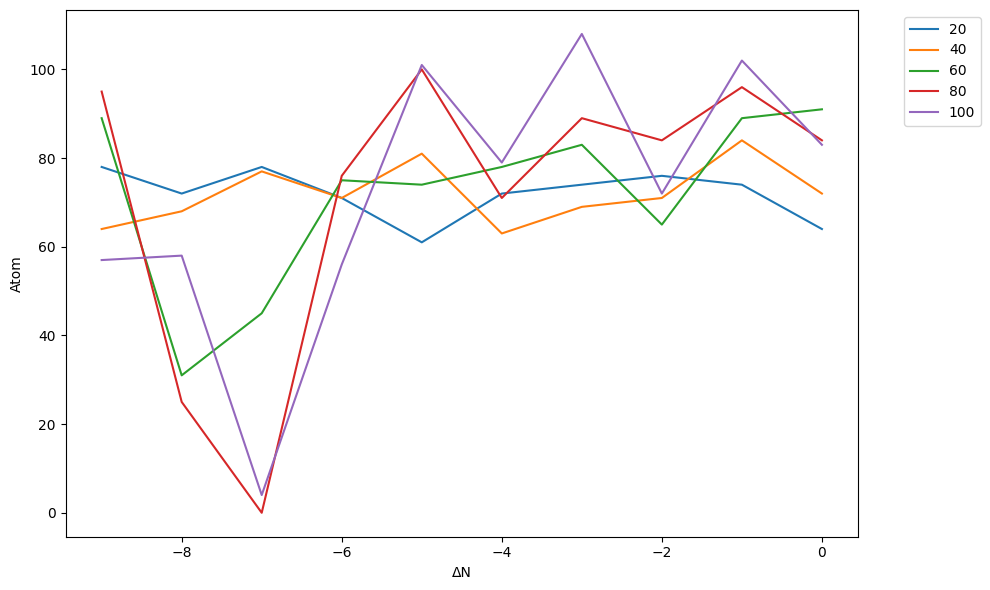

D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\004\004_c60_plot.png


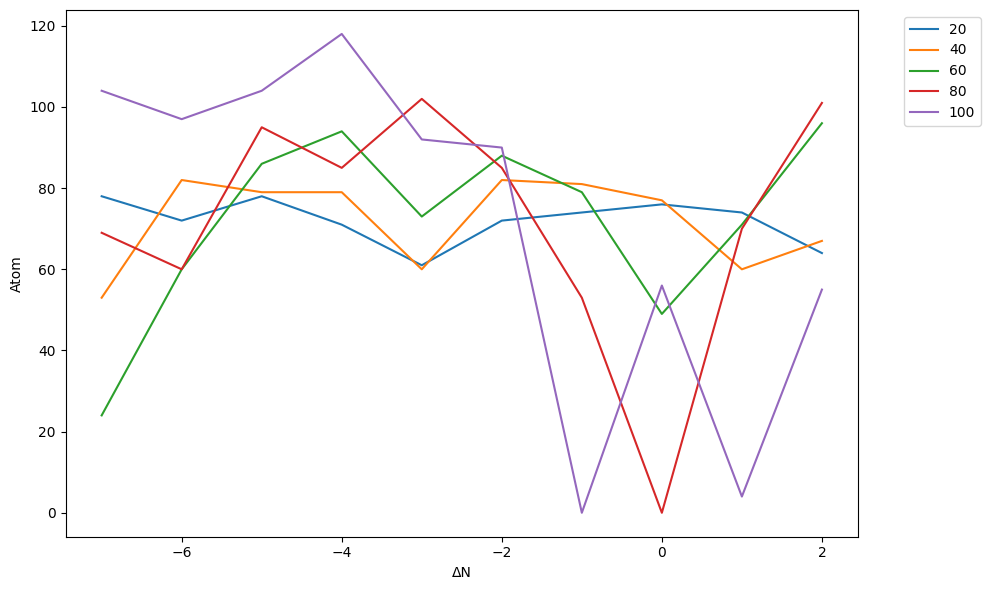

D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\005\005_c60_plot.png


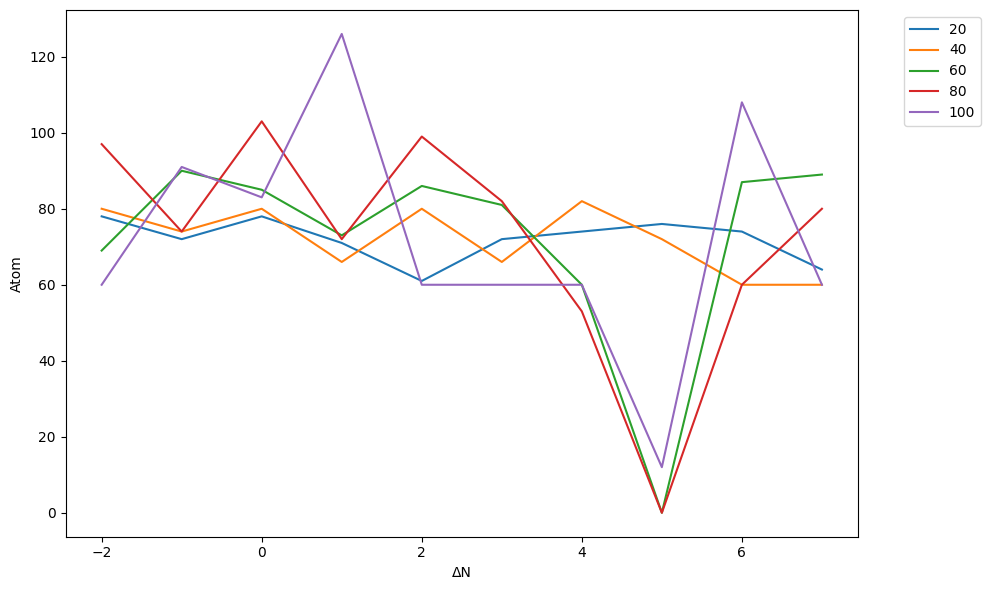

In [3]:
#C60 density chart at relative coordinates
import pandas as pd
import matplotlib.pyplot as plt
import os
main_directory = r"D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std"

# 遍历主目录下的所有子目录
for root, dirs, files in os.walk(main_directory):
#     print(root)
#     print(dirs)
    # 读取min_value.txt文件
    for curDir in dirs:
        modified_csv_file_path =os.path.join(root, curDir, "c60_modified.csv")
      # 检查文件是否存在
        if not os.path.exists(modified_csv_file_path):
            print(f"文件 {modified_csv_file_path} 不存在。")
            exit()

        # 读取修改后的CSV文件
        try:
            df_modified = pd.read_csv(modified_csv_file_path)
        except Exception as e:
            print(f"读取修改后的CSV文件时出错: {e}")
            exit()

        # 检查数据是否合法
        if df_modified.shape[1] < 2:
            print("c60_modified.csv文件中没有足够的数据。")
            exit()

        # 提取横坐标（第一列）
        x_data = df_modified.iloc[:, 0]

        # 设置图形
        plt.figure(figsize=(10, 6))

        # 遍历其他列，绘制每一列数据
        for i in range(1, df_modified.shape[1]):
            y_data = df_modified.iloc[:, i]
            label = f"{20 * i}"  # 生成标签

            plt.plot(x_data, y_data, label=label)  # 绘图

        # 添加图例
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        # 添加标题和轴标签
#         plt.title('Data from c60_modified.csv')
        plt.xlabel('ΔN')
        plt.ylabel('Atom')
        save_path = os.path.join(root,curDir, f"{curDir}_c60_plot.png")
        print(save_path)

        # 保存图形
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

        # 显示图形
        plt.tight_layout()
        plt.show()
        

In [9]:
#Calculate the average value and  standard error 
#save file AVG.xlsx and SE.xlsx
import pandas as pd
import os
import numpy as np

# 路径和文件名设置
base_path = r"D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std"

# 用于存储读取的DataFrame列表
dataframes = []

# 遍历主目录下的所有子目录
for root, dirs, files in os.walk(base_path):
    for curDir in dirs:
        folder = os.path.join(root, curDir)
        print(folder)
        file_name = 'c60_modified.csv'  # 假设每个子目录中CSV文件的文件名相同

        # 读取每个子目录中的CSV文件
        file_path = os.path.join(folder, file_name)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            print(df)
            dataframes.append(df)
        else:
            print(f"文件未找到: {file_path}")
        

# 确保所有DataFrame的列名一致
columns_to_average = ['Unnamed: 0', '0', '20', '40', '60', '80']

# 计算平均值和标准误差
avg_df = pd.DataFrame()
std_err_df = pd.DataFrame()

# 计算数值列的平均值和标准误差
for column in columns_to_average:
    print(f"--- Calculating for column: {column} ---")

    # 计算平均值
    avg_values = np.array([df[column].values for df in dataframes])
    avg_value = np.mean(avg_values, axis=0)
    avg_df[column] = avg_value
    print(f"Column: {column}, avg_value: {avg_value}")

    # 计算标准误差
    std_dev = np.std(avg_values, axis=0, ddof=1)  # 样本标准差
    std_err = std_dev / np.sqrt(len(dataframes))
    std_err_df[column] = std_err

    print(f"Column: {column}, Standard Error: {std_err}")  # 打印标准误差

# 保存结果到新的Excel文件
output_AVG_file_path = os.path.join(base_path, 'AVG.xlsx')
with pd.ExcelWriter(output_AVG_file_path) as writer:
    avg_df.to_excel(writer, sheet_name='Average', index=False)

output_SE_file_path = os.path.join(base_path, 'SE.xlsx')
with pd.ExcelWriter(output_SE_file_path) as writer:
    std_err_df.to_excel(writer, sheet_name='Standard Error', index=False)

print("平均值和标准误差已计算并保存到:", output_AVG_file_path)
print("平均值和标准误差已计算并保存到:", output_SE_file_path)

D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\001
   Unnamed: 0   0  20  40   60   80
0        -4.0  78  72  85  102   93
1        -3.0  72  63  88   77  109
2        -2.0  78  78  67   90   68
3        -1.0  71  87  83   90   95
4         0.0  61  72  91   82  105
5         1.0  72  60  71   98  100
6         2.0  74  81  85   78   60
7         3.0  76  39  30   42   60
8         4.0  74  79  41    0    0
9         5.0  64  89  79   61   30
D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\002
   Unnamed: 0   0  20  40   60   80
0        -2.0  78  81  16   19    0
1        -1.0  72  78  89   90   81
2         0.0  78  60  75   76   99
3         1.0  71  63  67   97   95
4         2.0  61  77  83   78   85
5         3.0  72  81  90  101   95
6         4.0  74  60  75   79   91
7         5.0  76  79  87   92  110
8         6.0  74  60  78   88   64
9         7.0  64  81  60    0    0
D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\003
   Unnamed: 0   0  20  40   60   80
0        -9.0  78  64  89   95   57
1        -8.0  72  68  31   25 

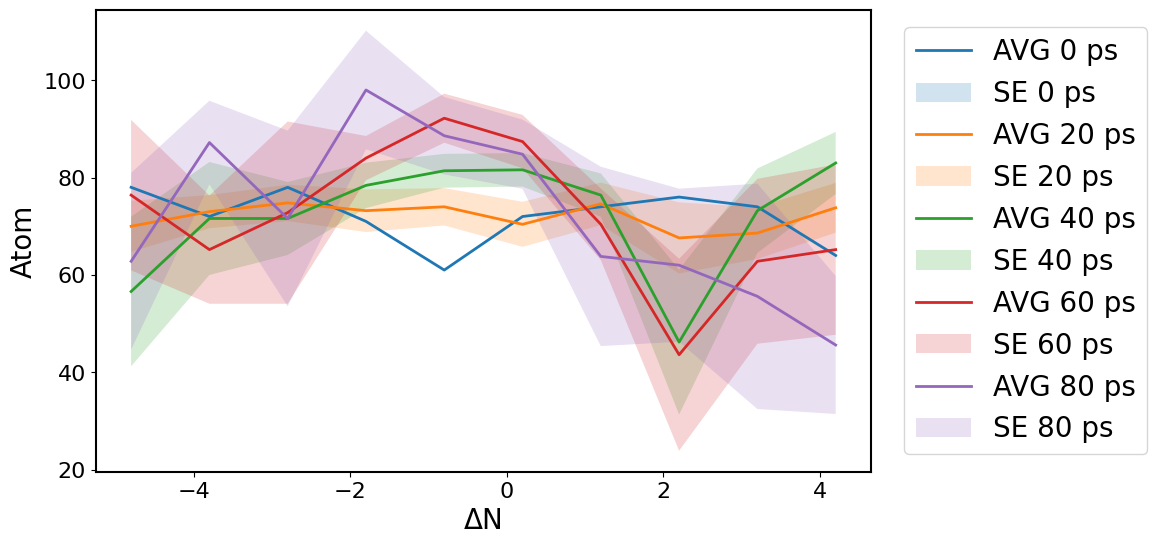

In [10]:
#Map of the average and standard error band
import pandas as pd
import matplotlib.pyplot as plt
import os

# 定义文件路径
avg_file_path = r'D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\AVG.xlsx'
se_file_path = r'D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\SE.xlsx'

# 读取AVG.xlsx文件，忽略前几行（假设忽略前3行）
avg_df = pd.read_excel(avg_file_path, skiprows=0)

# 读取SE.xlsx文件，忽略前几行（假设忽略前3行）
se_df = pd.read_excel(se_file_path, skiprows=0)

# 获取横坐标（第一列数据）
x_values = avg_df.iloc[:, 0]

# 获取纵坐标（其他列数据）
y_values = avg_df.iloc[:, 1:]

# 获取标准误差数据
se_values = se_df.iloc[:, 1:]

# 创建图形
plt.figure(figsize=(10, 6))

# 遍历每一列数据进行绘图，并添加标准误差带
for i, column in enumerate(y_values.columns):
    plt.plot(x_values, y_values[column], label=f"AVG {y_values[column].name} ps", linewidth=2)
    plt.fill_between(x_values, y_values[column] - se_values.iloc[:, i], y_values[column] + se_values.iloc[:, i], alpha=0.2,label=f'SE {column} ps')

# 添加标题和标签
plt.xlabel('ΔN', fontsize=20)
plt.ylabel('Atom', fontsize=20)
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center',fontsize=20)
ax = plt.gca()  # 获取当前 axes 对象
ax.tick_params(axis='both', which='major', labelsize=16)
# 设置所有边框的宽度
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # 设置边框宽度为1.5
plt.savefig(r'D:\cnt拉伸数据\hxy对比\新建文件夹\avg_std\AVG_SE_plot.png', dpi=600,bbox_inches='tight')
# 显示图形
plt.show()